In [1]:
# For data processing
import numpy as np
from math import sqrt
# For data processing and manipulation
import pandas as pd
import csv
 
# For date calculations
import datetime
import time
 
# For ploting data
import IPython
import IPython.display
 
import itertools
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
# For checking path
import os , gc
from os import path
import csv
import requests
import json
from IPython.display import clear_output 
 
from scipy.stats import hmean
 
from sklearn.metrics import mean_squared_error

import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [3]:
DATABASE_URL = "http://127.0.0.1:5000/"

In [4]:
ROOTPATH = 'C:\\Study\\CSE 4000\\New folder\\Thesis\\'
#PATH_IMAGE = ROOTPATH+'images_chicago\\'
#PATH_WEAT_CHI = ROOTPATH+"dataset\\processed_weather_data_chicago_2004_2017.csv"

test query

In [7]:
requestData = {
    'wx_phrase': 'Cloudy',
    'pressure': 1013.64}
urlTest = DATABASE_URL + '/query/find/sf/weather'
response = requests.get(urlTest, json=requestData)
if response.ok:
    try:
        data = response.json()
        print(len(data))
    except json.JSONDecodeError as e:
        print('Error in decoding json: ' + str(e))
else:  
    print("Error:", response.status_code)

135


<h3><b> Phrase Types without Pipeline </h3></b>

In [12]:
# Record the start time
start_time = time.time()

requestData = {
    'field': 'wx_phrase'}

urlTest = DATABASE_URL + '/query/unique/sf/weather'
x = requests.get(urlTest, json=requestData)
num_phrase = x.json()
print("Num Phrase :" , len(num_phrase))
#for i in num_phrase:
    #print(i)

# Record the end time
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time: {:.2f} seconds".format(execution_time))

Num Phrase : 37
Execution Time: 0.32 seconds


<h3><b> Phrase Types using Pipeline </h3></b>

In [15]:
# Record the start time
start_time = time.time()

phraseXCount = {}
urlTest = DATABASE_URL + "/query/aggregate/sf/weather"
pipeline = [
    {
        "$group": {
                "_id": "$wx_phrase",
                "Count" : {"$sum" : 1}
        }
    }
]
x = requests.get(urlTest, json=pipeline)
data = x.json()
tsum = sum([x['Count'] for x in data])
c = 0
for doc in data:
    print(doc)
    phraseXCount[doc['_id']] = doc['Count']
    c = c + 1

# Record the end time
end_time = time.time()
execution_time = end_time - start_time


print("Total Unique Types = " , c)
print("Total Cases = " , tsum)
print("Execution Time: {:.2f} seconds".format(execution_time))
        

{'Count': 575, '_id': 'Rain'}
{'Count': 89, '_id': 'Mist'}
{'Count': 38530, '_id': 'Mostly Cloudy'}
{'Count': 26, '_id': 'Patches of Fog'}
{'Count': 8122, '_id': 'Fair / Windy'}
{'Count': 12, '_id': 'T-Storm'}
{'Count': 1713, '_id': 'Cloudy / Windy'}
{'Count': 808, '_id': 'Fog'}
{'Count': 24386, '_id': 'Partly Cloudy'}
{'Count': 47, '_id': 'Heavy Rain / Windy'}
{'Count': 2506, '_id': 'Light Rain'}
{'Count': 5, '_id': 'Heavy T-Storm / Windy'}
{'Count': 8, '_id': 'Light Rain with Thunder'}
{'Count': 3449, '_id': 'Mostly Cloudy / Windy'}
{'Count': 31008, '_id': 'Cloudy'}
{'Count': 4, '_id': 'Squalls'}
{'Count': 11, '_id': ''}
{'Count': 3790, '_id': 'Partly Cloudy / Windy'}
{'Count': 461, '_id': 'Haze'}
{'Count': 9, '_id': 'Drizzle'}
{'Count': 57, '_id': 'Light Drizzle'}
{'Count': 1, '_id': 'Thunder / Windy'}
{'Count': 6, '_id': 'Heavy T-Storm'}
{'Count': 3, '_id': 'Light Drizzle / Windy'}
{'Count': 135, '_id': 'Rain / Windy'}
{'Count': 2, '_id': 'Squalls / Windy'}
{'Count': 360, '_id': 'L

finding min and max temprature per wx phrase without pipeline

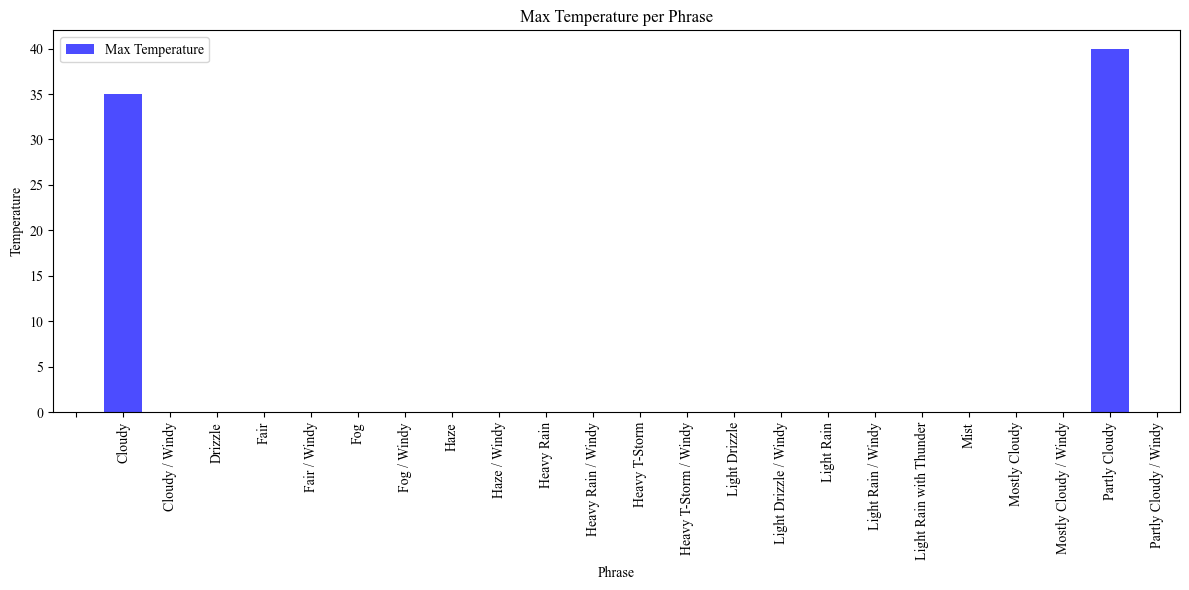

In [ ]:
phrase_count = {}
max_temp = {}
min_temp = {}
for phrase_now in num_phrase:
    requestData = {
        'wx_phrase': phrase_now}
    urlTest = DATABASE_URL + '/query/find/sf/weather'
    response = requests.get(urlTest, json=requestData)
    data = response.json()
    
    max_temperature = None
    min_temperature = None

    for item in data:
        temperature = item.get('max_temp')  # Replace 'temp' with the actual key for temperature in your data
        if temperature is not None:
            if max_temperature is None or temperature > max_temperature:
                max_temperature = temperature
        temperature = item.get('min_temp')
        if temperature is not None:
            if min_temperature is None or temperature < min_temperature:
                min_temperature = temperature
    if max_temperature is None:
        max_temperature = 0
    if min_temperature is None:
        min_temperature = 0
    max_temp[phrase_now] = max_temperature
    min_temp[phrase_now] = min_temperature
        
phrases = list(max_temp.keys())
max_temperatures = list(max_temp.values())
min_temperatures = list(min_temp.values())

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(phrases, max_temperatures, label='Max Temperature', alpha=0.7, color='b')

# Add labels and legend
plt.xlabel('Phrase')
plt.ylabel('Temperature')
plt.title('Max Temperature per Phrase')
plt.legend()

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

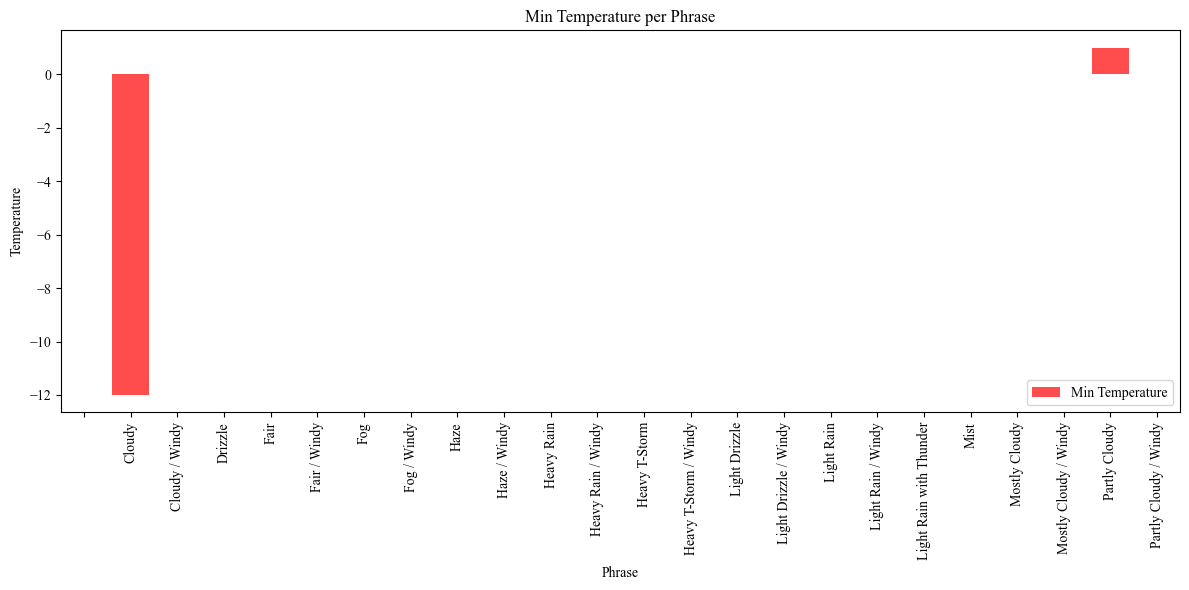

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(phrases, min_temperatures, label='Min Temperature', alpha=0.7, color='r')
# Add labels and legend
plt.xlabel('Phrase')
plt.ylabel('Temperature')
plt.title('Min Temperature per Phrase')
plt.legend()

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

not done finding min and max temprature per wx phrase using pipeline

In [ ]:
#kmne korbo janina

not working max temp per year without pipeline

In [ ]:
yearXcount = {}
for year_now in range(2004,2024):
    requestData = {
        'expire_date_time': "01/01/2004 14:00:00"}
    urlTest = DATABASE_URL + '/query/find/sf/weather'
    response = requests.get(urlTest, json=requestData)
    data = response.json()
    yearXcount[year_now] = len(data)
print(yearXcount)

{2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 0, 2020: 0, 2021: 0, 2022: 0, 2023: 0}


not working max temp per year using pipeline

In [ ]:
# Record the start time
start_time = time.time()

urlTest = DATABASE_URL + "/query/aggregate/sf/weather"
pipeline = [
    {
        "$addFields": {
            "expire_date_time": {
                "$dateFromString": {
                    "dateString": "$expire_date_time",
                    "format": "%m/%d/%Y %H:%M:%S"
                }
            }
        }
    },
    {
        "$addFields": {
            "year": { "$year": "$expire_date_time" }
        }
    },
    {
        "$group": {
            "_id": "$year",
            "max_temperature": { "$max": "$temp" }
        }
    },
    {
        "$sort": {
            "year": 1
        }
    }
]

x = requests.get(urlTest, json=pipeline)
data = x.json()

# Print the result
for doc in data:
    print(doc)

# Record the end time
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time: {:.2f} seconds".format(execution_time))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

test query

In [ ]:
requestData = {
        'expire_date_time': "01/01/2022 14:00:00"}
urlTest = DATABASE_URL + '/query/find/sf/weather'
response = requests.get(urlTest, json=requestData)
data = response.json()
print(data)

[{'': 172387, 'expire_date_time': '01/01/2022 14:00:00', 'expire_time_gmt': 1641023760, 'heat_index': 8.0, 'pressure': 1016.23, 'rh': 71.0, 'temp': 8.0, 'valid_date_time': '01/01/2022 12:00:00', 'valid_time_gmt': 1641016560, 'vis': 16.0, 'wc': 7.0, 'wdir': 310.0, 'wspd': 9.0, 'wx_phrase': 'Fair'}]


count cloudy days

In [20]:
# Record the start time
start_time = time.time()
import re
match_word = "Rain"
rainXcount = {}

urlTest = DATABASE_URL + "/query/aggregate/sf/weather"
pipeline = [
    {
        "$match": {
            "wx_phrase": {"$regex": match_word, "$options": "i"}
        }
    }
]

x = requests.get(urlTest, json=pipeline)
data = x.json()

c = 0
# Print the result
for doc in data:
    rainXcount[doc['_id']] = doc['expire_date_time']
    print(f"On date : {doc['expire_date_time']} , {doc['wx_phrase']} was observed")
    c = c + 1
print("Total Cases = " , c)

# Record the end time
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time: {:.2f} seconds".format(execution_time))

On date : 26/03/2014 03:00:00 , Rain was observed
On date : 26/03/2014 05:00:00 , Light Rain was observed
On date : 26/03/2014 20:00:00 , Light Rain was observed
On date : 26/03/2014 21:00:00 , Light Rain was observed
On date : 26/03/2014 22:00:00 , Light Rain was observed
On date : 26/03/2014 23:00:00 , Light Rain was observed
On date : 27/03/2014 02:00:00 , Light Rain was observed
On date : 27/03/2014 03:00:00 , Heavy Rain was observed
On date : 27/03/2014 04:00:00 , Light Rain was observed
On date : 27/03/2014 23:00:00 , Light Rain was observed
On date : 28/03/2014 17:00:00 , Light Rain was observed
On date : 29/03/2014 21:00:00 , Light Rain was observed
On date : 29/03/2014 22:00:00 , Light Rain was observed
On date : 29/03/2014 23:00:00 , Light Rain was observed
On date : 30/03/2014 00:00:00 , Light Rain was observed
On date : 30/03/2014 01:00:00 , Light Rain was observed
On date : 30/03/2014 02:00:00 , Light Rain was observed
On date : 30/03/2014 02:00:00 , Rain was observed
On d

In [21]:
del x

Wind Direction Distribution:



In [25]:
# Record the start time
start_time = time.time()

#Arrest count
wdirXCount = {}
urlTest = DATABASE_URL + "/query/aggregate/sf/weather"
pipeline = [
    {
        "$group": {
                "_id": "$wdir",
                "Intensity" : {"$sum" : 1}
        }
    },
    {
        "$sort": {
            "_id": 1
        }
    }
]
x = requests.get(urlTest, json=pipeline)
data = x.json()
tsum = sum([x['Intensity'] for x in data])
c = 0
for doc in data:
    print(doc)
    wdirXCount[doc['_id']] = doc['Intensity']
    c = c + 1

# Record the end time
end_time = time.time()
execution_time = end_time - start_time

print("Total directions = " , c)
print("Total Cases = " , tsum)
print("Execution Time: {:.2f} seconds".format(execution_time))
        

{'Intensity': 23110, '_id': 'nan'}
{'Intensity': 2204, '_id': '10.0'}
{'Intensity': 1, '_id': '19.0'}
{'Intensity': 2313, '_id': '20.0'}
{'Intensity': 2302, '_id': '30.0'}
{'Intensity': 2023, '_id': '40.0'}
{'Intensity': 1745, '_id': '50.0'}
{'Intensity': 1680, '_id': '60.0'}
{'Intensity': 1535, '_id': '70.0'}
{'Intensity': 1441, '_id': '80.0'}
{'Intensity': 1256, '_id': '90.0'}
{'Intensity': 1361, '_id': '100.0'}
{'Intensity': 1269, '_id': '110.0'}
{'Intensity': 1767, '_id': '120.0'}
{'Intensity': 2258, '_id': '130.0'}
{'Intensity': 2241, '_id': '140.0'}
{'Intensity': 2220, '_id': '150.0'}
{'Intensity': 2400, '_id': '160.0'}
{'Intensity': 2664, '_id': '170.0'}
{'Intensity': 2619, '_id': '180.0'}
{'Intensity': 2710, '_id': '190.0'}
{'Intensity': 2821, '_id': '200.0'}
{'Intensity': 2693, '_id': '210.0'}
{'Intensity': 2738, '_id': '220.0'}
{'Intensity': 2998, '_id': '230.0'}
{'Intensity': 3650, '_id': '240.0'}
{'Intensity': 5648, '_id': '250.0'}
{'Intensity': 11597, '_id': '260.0'}
{'Int

In [27]:
del x

in a range check

In [30]:
# Record the start time
start_time = time.time()

urlTest = DATABASE_URL + "/query/aggregate/sf/weather"
pipeline = [
    {
        "$match": {
            "$and": [
                {"pressure": {"$lt": 1001.00}},
                {"pressure": {"$gt": 1000.00}}
            ]
        }
    }
]
x = requests.get(urlTest, json=pipeline)
data = x.json()
#tsum = sum([x['pressure_days'] for x in data])
c = 0
for doc in data:
    print(doc)
    #arrestXCount[doc['_id']] = doc['Number of Cases']
    c = c + 1

# Record the end time
end_time = time.time()
execution_time = end_time - start_time


print("Total Cases= " , c)
print("Execution Time: {:.2f} seconds".format(execution_time))
        

{'': 7561, '_id': '652c1ef857fa4f5aaadc17c0', 'expire_date_time': '20/10/2004 15:00:00', 'expire_time_gmt': 1098262560, 'heat_index': 13.0, 'max_temp': nan, 'min_temp': nan, 'pressure': 1000.54, 'rh': 89.0, 'temp': 13.0, 'valid_date_time': '20/10/2004 13:00:00', 'valid_time_gmt': 1098255360, 'vis': 6.0, 'wc': 13.0, 'wdir': 270.0, 'wspd': 15.0, 'wx_phrase': 'Cloudy'}
{'': 7564, '_id': '652c1ef857fa4f5aaadc17c3', 'expire_date_time': '20/10/2004 18:00:00', 'expire_time_gmt': 1098273360, 'heat_index': 13.0, 'max_temp': nan, 'min_temp': nan, 'pressure': 1000.24, 'rh': 80.0, 'temp': 13.0, 'valid_date_time': '20/10/2004 16:00:00', 'valid_time_gmt': 1098266160, 'vis': 16.0, 'wc': 13.0, 'wdir': 150.0, 'wspd': 20.0, 'wx_phrase': 'Mostly Cloudy'}
{'': 7565, '_id': '652c1ef857fa4f5aaadc17c4', 'expire_date_time': '20/10/2004 18:00:00', 'expire_time_gmt': 1098274740, 'heat_index': 11.0, 'max_temp': nan, 'min_temp': nan, 'pressure': 1000.66, 'rh': 88.0, 'temp': 11.0, 'valid_date_time': '20/10/2004 16

<h3><b> not working Average visualization</h3></b>

In [ ]:
# Record the start time
start_time = time.time()

urlTest = DATABASE_URL + "/query/aggregate/sf/weather"
pipeline = [
    {
        "$group": {
            "_id": None,
            "avg_vis": { "$avg": "$vis" }
        }
    }
]
x = requests.get(urlTest, json=pipeline)
data = x.json()


# Print the result
for doc in data:
    print(doc)

# Record the end time
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time: {:.2f} seconds".format(execution_time))
        

{'_id': 'None', 'avg_vis': nan}
Execution Time: 0.16 seconds


<h3><b> not working Max vis </h3></b>

In [35]:
# Record the start time
start_time = time.time()

urlTest = DATABASE_URL + "/query/aggregate/sf/weather"
pipeline = [
    {
        "$group": {
            "_id": None,
            "max_vis": { "$max": "$vis" }
        }
    }
]

x = requests.get(urlTest, json=pipeline)
data = x.json()

# Print the result
for doc in data:
    print(doc)

# Record the end time
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time: {:.2f} seconds".format(execution_time))
        

{'_id': 'None', 'max_vis': 39.0}
Execution Time: 0.25 seconds


<h3><b> nan asche min vis </h3></b>

In [ ]:
# Record the start time
start_time = time.time()

urlTest = DATABASE_URL + "/query/aggregate/sf/weather"
pipeline = [
    {
        "$group": {
            "_id": None,
            "min_vis": { "$min": "$vis" }
        }
    }
]

x = requests.get(urlTest, json=pipeline)
data = x.json()

# Print the result
for doc in data:
    print(doc)

# Record the end time
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time: {:.2f} seconds".format(execution_time))
        

{'_id': 'None', 'min_vis': nan}
Execution Time: 0.17 seconds
